#### WHAT IS REGRESSION ANALYSIS

- Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique Is used for forecasting, time series modelling and finding the causal effect relationship between the variables. For example, relationship between rash driving and number of road accidents by a driver Is best studied through regression.

- Regression analysis is an important tool for modelling and analyzing data. Here we fit a curve/ line to the data points in such a manner that the differences between the distances of data points trom the curve or line is minimized.


#### WHY DO WE USE REGRESSION

- Regression analysis estimates the relationship between two or more variables. For example:

- Let's say you want to estimate growth in sales of a company based on current economic conditions. You have the recent company data which indicates that the growth in sales is around two and a half times the growth in the economy. Using this insight, we can predict future sales of the company based on current & past information.

- There are multiple benefits of using regression analysis. They are as follows:

    1. It indicates the significant relationships between dependent variable and independent variable.

    2. It indicates the strength of impact of multiple independent variables on a dependent variable.


- Regression analysis also allows us to compare the effects of variables measured on different scales, such as the effect of price changes and the number of promotional activities. These benefits help market researchers / data analysts data scientists to eliminate and evaluate the best set of variables to be used for building predictive models.

#### TYPES OF REGRESSION
There are various types of regression techniques available to make predictions. These techniques are mostly driven by three metrics ( number of independent variables , type of dependent variables , shape of regression line)

- Linear Regression
- Logistic Regression
- Ridge Regression
- Lasso Regression

#### GRADIENT DESCENT
- Gradient Descent is Optimisation Technique
- Minimises Error Generated
- Works Iteratively , Calculating error at each Iteration
- Optimises Model Parameters
- Until model converges to Minimal Cost
- Iterative approach in which we take small steps in direction of decreasing gradient until it becomes zero at optimal value of theta

#### GRADIENT DESCENT IN LINEAR REGRESSION :

- Random Initialisation
- Generating Predictions
- Calculating Cost
- Updating Parameters

#### AIM : 
Predict the percentage of student based on no. of study hours using Linear Regression

In [4]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the dataset

url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
print('Dataset imported successfully!!')

Dataset imported successfully!!


In [6]:
# Getting the first five values from dataset

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# Concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# Dimensionality of the dataset i.e number of rows and columns

df.shape

(25, 2)

In [9]:
# Checking for null values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
# Statistical information of data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


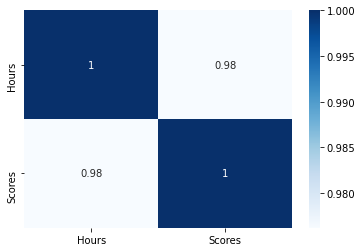

In [12]:
# Finding pairwise correlation of all columns

sns.heatmap(df.corr() ,annot=True, cmap = 'Blues');

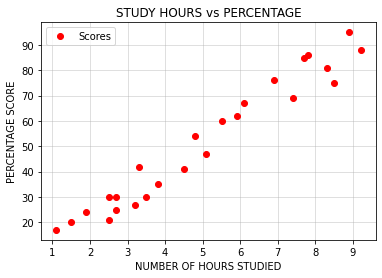

In [13]:
# Visualising the dataset by plotting the data on a 2-D graph

df.plot(x='Hours', y='Scores' , style = 'ro' , legend = True)
plt.xlabel('NUMBER OF HOURS STUDIED')
plt.ylabel('PERCENTAGE SCORE')
plt.title('STUDY HOURS vs PERCENTAGE')
plt.grid(alpha=0.5)
plt.show()

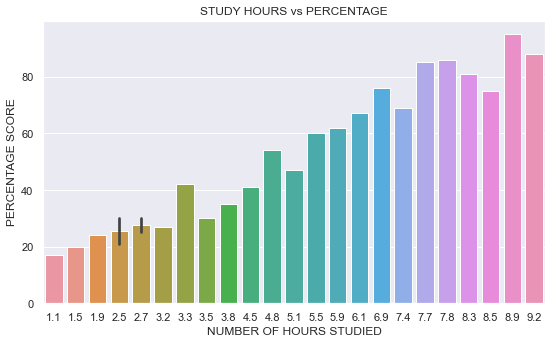

In [14]:
# Visualising the dataset through Bar plot

sns.set(rc={'figure.figsize':(9,5.2)})
sns.barplot(x=df.Hours, y=df.Scores)
plt.xlabel('NUMBER OF HOURS STUDIED')
plt.ylabel('PERCENTAGE SCORE')
plt.title('STUDY HOURS vs PERCENTAGE')
plt.show()

#### CONCLUSION
From the above plots, it can be clearly seen that there is a positive linear relationship between number of hours studied and percentage score obtained by the student.

In [15]:
# Fitting the dataset

x = df[['Hours']].values
y = df[['Scores']].values

In [16]:
# Splitting the data into training and test sets using Scikit Learn library
# Here x is independent variable(input/attribute) and y is dependent variable(output/label)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

# Shape of training and test data:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20, 1) (5, 1)


In [17]:
# Training the model with linear regression algorithm

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)
print('Successfully completed Model Training.')

Successfully completed Model Training.


In [18]:
# Model Parameters
# Getting the regressor coefficient(slope) and constant(intercept) term

print("Intercept:", model.intercept_)
print("Regression coefficient:", model.coef_)

Intercept: [2.01816004]
Regression coefficient: [[9.91065648]]


In [20]:
# Estimating training and test scores

print('TRAINSET ACCURACY ----> ', model.score(x_train, y_train))
print('TESTSET ACCURACY ----> ', model.score(x_test, y_test))

TRAINSET ACCURACY ---->  0.9515510725211552
TESTSET ACCURACY ---->  0.9454906892105356


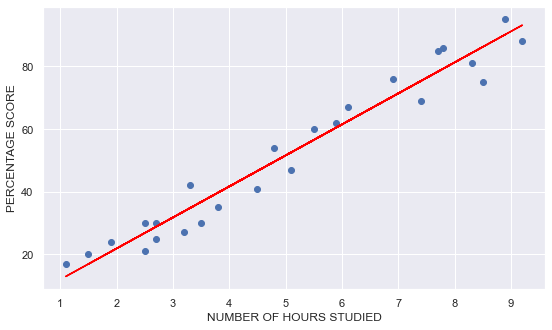

In [21]:
# Plotting the regression line

plt.scatter(x, y)

line = model.coef_*x + model.intercept_
plt.plot(x, line, color = 'red')

plt.xlabel("NUMBER OF HOURS STUDIED")
plt.ylabel("PERCENTAGE SCORE")
plt.show()

In [23]:
# Making prediction for training and test dataset

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Comparing Original values with the Predicted data

df_compare = pd.DataFrame({'Original': y_test.flatten(), 'Predicted': y_pred_test.flatten()})
df_compare

,Original,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


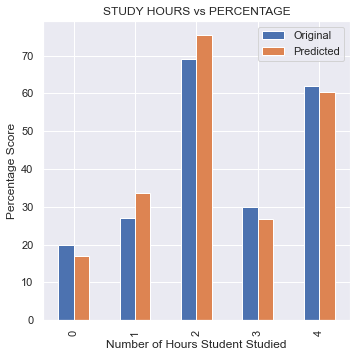

In [24]:
df_compare.plot(kind='bar', figsize=(5.5,5.5))
plt.xlabel('Number of Hours Student Studied')
plt.ylabel('Percentage Score')
plt.title('STUDY HOURS vs PERCENTAGE')
plt.show()

In [25]:
# Measuring the regression performance

from sklearn import metrics
print("Mean Absolute Error :" , metrics.mean_absolute_error(y_test, y_pred_test.flatten()))
print("Mean Squared Error :" , metrics.mean_squared_error(y_test, y_pred_test))
print("Root Mean Square Error :" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_test.flatten())))

Mean Absolute Error : 4.183859899002975
Mean Squared Error : 21.5987693072174
Root Mean Square Error : 4.6474476121003665


In [26]:
# Checking R-squared score of the model

from sklearn.metrics import r2_score
print("#### stats on training dataset ####")
print("R-squared score:", r2_score(y_train, y_pred_train))
print("#### stats on test dataset ####")
print("R-squared score:", r2_score(y_test, y_pred_test))

#### stats on training dataset ####
R-squared score: 0.9515510725211552
#### stats on test dataset ####
R-squared score: 0.9454906892105356


The r2_score represents the proportion of variance (of y) that has been explained by the independent variable in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.